In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train ,y_train),(x_test ,y_test)=mnist.load_data()

In [5]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import np_utils

In [7]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [17]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [20]:
model.fit(x_train,y_train,batch_size=100,epochs=12)

Epoch 1/12
60000/60000 [==============================] - 15s 252us/step - loss: 0.1786 - acc: 0.1068
Epoch 2/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.1146 - acc: 0.3746
Epoch 3/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0192 - acc: 0.8586
Epoch 4/12
60000/60000 [==============================] - 11s 179us/step - loss: 0.0159 - acc: 0.8781
Epoch 5/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.0147 - acc: 0.8840
Epoch 6/12
60000/60000 [==============================] - 12s 194us/step - loss: 0.0141 - acc: 0.8883
Epoch 7/12
60000/60000 [==============================] - 12s 192us/step - loss: 0.0107 - acc: 0.9161
Epoch 8/12
60000/60000 [==============================] - 12s 195us/step - loss: 0.0022 - acc: 0.9860
Epoch 9/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0018 - acc: 0.9893
Epoch 10/12
60000/60000 [==============================] - 12s 193us/step - loss: 

In [ ]:
model_json=model.to_json()
open('Write_model_CNN.json','w').write(model_json)
model.save_weights('Write_model_CNN.h5')

In [ ]:
predict=model.predict_classes(x_test)

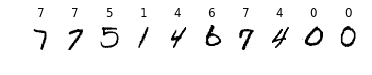

In [36]:
pick=np.random.randint(1,9999,10)

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")